# matplotlib - Advanced Layouts

:::{admonition} Learning Objectives
* Be able to use matplotlib's `.subplot()` to layout plots in regular grid arrangements.
* Be able to use matplotlib's `.subplot2grid()` to create more advanced layouts with plots spanning more than one "grid space."
:::

:::{important}  
Much of the information and many of the figures in this notebook come from: "Python Plotting With Matplotlib (Guide)" written by *Brad Solomon* and published on realpython.com at https://realpython.com/python-matplotlib-guide.  The website [realpython.com](https://realpython.com/) is a great way to learn python and is filled with resources.  
:::

(3114:05:data-file-for-lesson)=
## Data File for Lesson

You will need the following data file for this lesson:  
[cal_housing.data](https://drive.google.com/uc?id=1l4YCgMuYTx4y4ax7uUcHevYbOVlYtajx&export=download)  
Pace, R. Kelley, and Ronald Barry, "Sparse Spatial Autoregressions," Statistics and Probability Letters, Volume 33, Number 3, May 5 1997, p. 291-297.

A description of the data columns included in this dataset are reprinted below.

```{figure} ../images/housing_data_description.png  
:height: 900px
:name: Calif_dataset  
  
Reprinted from https://developers.google.com/machine-learning/crash-course/california-housing-data-description  
```

<img alt="california housing data" src="../images/housing_data_description.png" width=500px>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# column names according to the description above
column_names=['longitude' ,'latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome ($10,000)','medianHouseValue ($)']
url="https://drive.google.com/uc?id=1l4YCgMuYTx4y4ax7uUcHevYbOVlYtajx"
raw=pd.read_csv(url, names=column_names, skiprows=0, sep=',')
raw.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,"medianIncome ($10,000)",medianHouseValue ($)
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Layout using subplot: Figure vs Axes

In matplotlib, a "**figure**" is the outer container that might contain multiple plots for example in a row or grid or it might contain just one plot as shown below.  The individual plots are referred to as "**axes**". 

```{figure} ../images/Axes_Figures_schematic.png
:height: 350px
:name: Figure_Axes

reprinted from https://realpython.com/python-matplotlib-guide/#the-matplotlib-object-hierarchy
```


<img alt="Figure vs Axes" src="../images/Axes_Figures_schematic.png" width=300px>

If we name the Figure above "fig" and the Axes box as "ax", we can create the layout with the code:  
```python  
fig, ax = plt.subplots(nrows=1, ncols=1)  
```  
Then we just need to fill "ax" for example, with a scatter plot of red circles:  
```python
ax.scatter(x=xdata, y=ydata, marker='o', c='r')
```

In [2]:
from jupyterquiz import display_quiz

# tags:  remove-input
# menu: View/Cell toolbar/tags or in Jupyter lab use gear icon on top right
# this will remove the code below when building Jupyter-book 
# could also use remove-cell but this code has no output

example=[{
        "question": '''How would you create two plots named "ax1" and "ax2" next to each other horizontally?''',
        "type": "multiple_choice",
        "answers": [
            {
                "code": "fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)",
                "correct": True,
                "feedback": "Correct. "
                    "The .subplots() function returns two outputs.  The first is the figure box and the second is a list of axes. "
                    "The axes names can be a 1D or 2D list depending on the layout."
            },
            {
                "code": "fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1)",
                "correct": False,
                "feedback": "Not quite.  This would produce two plots vertically."
            },
            {
                "code": "myfig, (axes_1, axes_2) = plt.subplots(nrows=1, ncols=2)",
                "correct": False,
                "feedback": "Good!  Although this would work just fine since you can name the figure and axes "
                "anything you want, the problem statement asked us to name the plots ax1 and ax2 rather than axes_1 and axes_2."
            }
        ]
    }];

In [3]:
display_quiz(example);  

<IPython.core.display.Javascript object>

We can test our layout by running the above codes without adding plots to our axes.  Let's try the vertical layout example.  

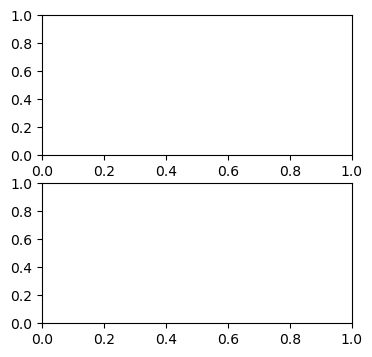

In [5]:
fig, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols=1,figsize=(4, 4))

or how about 2 rows of 3 plots horizontally...  Here we need to use a 2D list of axes: 

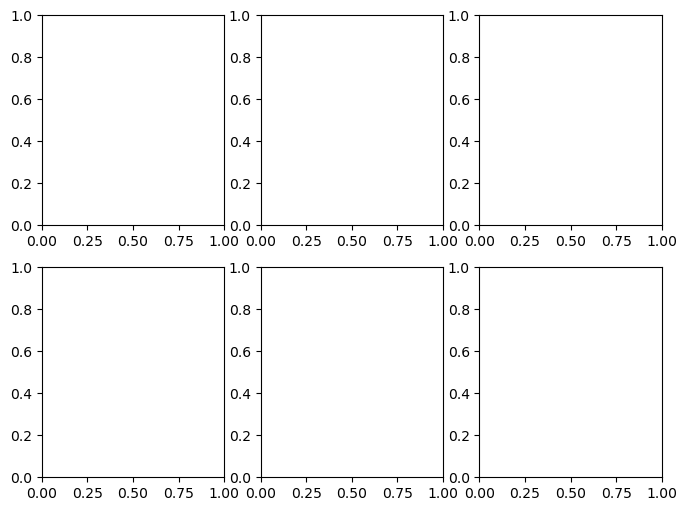

In [6]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(8, 6))

:::{note}  
Did you play around with the figsize=() in the above codes?  I hope you did.  You can't learn by being a passive reader.  You need to type out and experiment with the code as your read this textbook.  
:::

Now let's add plots.  First we need to generate some data. 

In [7]:
x = np.random.randint(low=1, high=11, size=50) #generate 50 random integers between 1 and 10
y = x + np.random.randint(1, 5, size=x.size)  #generate 50 random integers between 1 and 4 and add to x
data = np.column_stack((x, y))
data[0:5] #with numpy arrays we use different notation to slice elements as compared to pandas

array([[ 7,  9],
       [ 7, 11],
       [ 7, 10],
       [ 7, 11],
       [10, 13]])

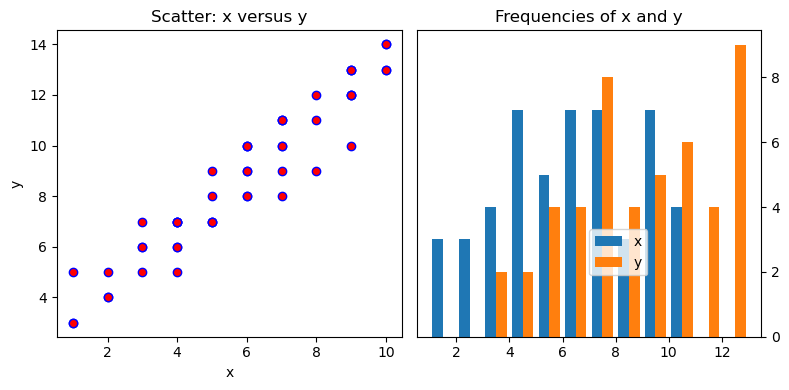

In [8]:
fig, (axes1, axes2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))
axes1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
axes1.set_title('Scatter: x versus y')
axes1.set_xlabel('x')
axes1.set_ylabel('y')

axes2.hist(data, bins=np.arange(data.min(), data.max()),label=('x', 'y'))
axes2.legend(loc=(0.5, 0.2))
axes2.set_title('Frequencies of x and y')
axes2.yaxis.tick_right()

fig.tight_layout()

**So many things to tweak in the above code...**  For example, it might be nice to move that legend in the second plot.  Currently, it is overlapping our bars.  Also, 'edgecolor' looks like an interesting option in the first plot.  

## Advanced subplot layouts with `.subplot2grid()`

If you need more advanced layout beyond simple grids of graphs, then Matplotlib’s gridspec module allows for more subplot customization. Pyplot’s **subplot2grid()** interacts with this module. 

Say we want this setup:  

:::{image} ../images/3114_05_layout.png
:height: 500px
:::

<img alt="advanced layout" src="../images/3114_05_layout.png" width=600px>

Always think of the layout in terms of a regular grid.  The above layout could be obtained from a 3x2 grid where **ax1** spans 2 columns and 2 rows as shown below.  

:::{image} ../images/3114_05_layout_grid.png
:height: 500px
:::

<img alt="advanced layout" src="../images/3114_05_layout_grid.png" width=600px>

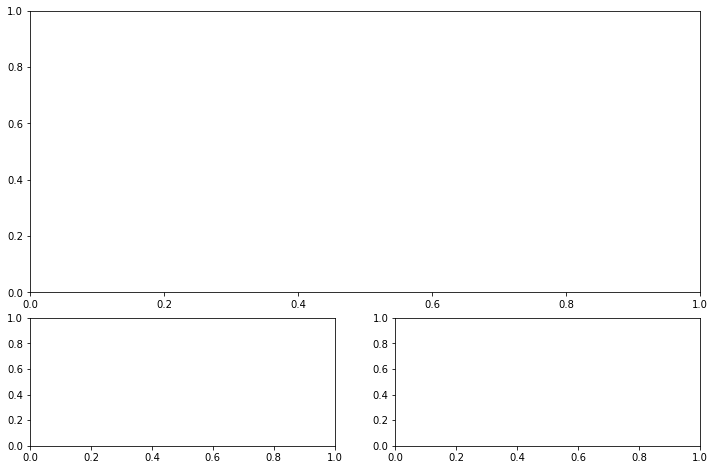

In [42]:
gridsize = (3, 2) # setup our 3 x 2 grid
fig = plt.figure(figsize=(12, 8)) #overall size of figure
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2) # span 2 col and 2 rows
ax2 = plt.subplot2grid(gridsize, (2, 0)) #3rd row, 1st col
ax3 = plt.subplot2grid(gridsize, (2, 1)) #3rd row, 2nd col

## Adding Data to our Layout

We already [read California housing data](3114:05:data-file-for-lesson) into variable "raw".  

In [46]:
housing=raw.copy()
housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,"medianIncome ($10,000)",medianHouseValue ($)
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [68]:
# a function to add a textbox to our bottom to plots
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
    horizontalalignment='center',
    transform=ax.transAxes,
    bbox=dict(facecolor='white', alpha=0.6),
    fontsize=10)
    return ax

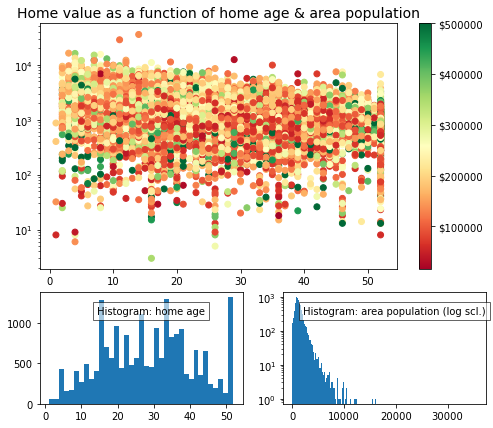

In [67]:
#create layout
gridsize = (3, 2)
fig = plt.figure(figsize=(8, 7)) #overall size of figure
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

#fill layout with plots
ax1.set_title('Home value as a function of home age & area population',fontsize=14)
sctr = ax1.scatter(x=housing.loc[:,"housingMedianAge"], y=housing.loc[:,"population"], c=housing.loc[:, "medianHouseValue ($)"], cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(housing.loc[:,"housingMedianAge"], bins='auto')
ax3.hist(housing.loc[:,"population"], bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

plt.show()

:::{note}
I'm sure you noticed these new options in the scatter plot coding above:  

```python
c=housing.loc[:, "medianHouseValue ($)"], cmap='RdYlGn'
```

"c" is the color which can be a single value like 'r' for red or it can be a list of values that get mapped to a color scale defined by "cmap".  Here the color map is 'RdYlGn' or Red, Yellow, Green and the c values are the mean house value for each point.  
:::

## Exercises

### Problem 1

Create two blank plots (axes) named "ax1" and "ax2" layed out next to each other horizontally.  

### Problem 2

Import the stress-strain data from the excel file [Al7075_out.xlsx](https://drive.google.com/uc?export=download&id=14uBqZM8ekl1RoFgx3nwCJM7fe9N144RI). 1) Reproduce the plot below [see your previous weeks homework](3114:02:problem-1). 2) Create an additional scatter plot where the stress is plotted to a maximum strain of 0.0075.  3) Layout these two plots next to each other horizontally.  4) Add x,y axis labels and title each plot. Your title for plot 2 should be descriptive of this "initial" region.  

<img alt="stress strain plot" src="../images/hw1_stress_strain_plot.png" width=300>

:::{figure} ../images/hw1_stress_strain_plot.png
:height: 250px
Stress-Strain response for Al7075 in tension. 
:::

### Problem 3

Use the data from the titanic given in the previous lesson, to create 6 plots in the following layout:

<img alt="6 Plot Layout" src="../images/3114_05_6_plot_layout.png" width=300>

:::{figure} ../images/3114_05_6_plot_layout.png
:height: 250px
:name: 6 Plot Layout  
6 plot layout template. 
:::

**Plot 1**: Scatter plot of 'number of passengers'(y) vs 'Age of passenger'(x).  You might try grouping by age and using .count().  
**Plot 2**: Histogram of the Age of people on board.  You can use something like: `ax2.hist(place your age data here, bins=30)`.  Play around with the bins number to see what looks best to you.  
**Plot 3 - 5**:  Reproduce plots shown below for plots 3, 4, and 5.    
**Plot 6**: Pie chart of the number of females in 1st, 2nd and 3rd class that survived. Include the percentages in each pie piece.   

<img alt="titanic data" src="../images/3114_05_ticket_price_sex_pclass.png" width=300>
<img alt="titanic data" src="../images/3114_05_passengers_survived_sex.png" width=300>
<img alt="titanic data" src="../images/3114_05_pie_died_sex_class.png" width=300>

:::{figure} ../images/3114_05_ticket_price_sex_pclass.png
:height: 250px
Reproduce for Problem 3 Plot 3 
:::  

:::{figure} ../images/3114_05_passengers_survived_sex.png
:height: 250px
Reproduce for Problem 3 Plot 4 
:::  

:::{figure} ../images/3114_05_pie_died_sex_class.png
:height: 250px
Reproduce for Problem 3 Plot 5 
:::  